## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>    
</ul>

<a id= 'intro'></a>
## Introduction

>  This data set contains information about 10866 movies collected with 21 features from The Movie Database (TMDb), including user ratings and revenue.

>**The features consists:**
>1. id                      
>2. imdb_id                 
>3. popularity              
>4. budget                  
>5. revenue                 
>6. original_title          
>7. cast                    
>8. homepage                
>9. director                
>10. tagline                 
>11. keywords                
>12. overview                
>13. runtime                 
>14. genres                  
>15. production_companies    
>16. release_date            
>17. vote_count              
>18. vote_average            
>19. release_year            
>20. budget_adj              
>21. revenue_adj  



## Question

1. The year with highest release of movies
2. Genre with Highest Movies Release
3. The most casted Actor in a movie
4. Director with highest number of Movies
5. The highest Production Company with a movie
6. Movies with highest and least Profit Earned 
7. Movies with highest and least revenue
8. Movies with largest and lowest budgets
9. Movies with longest and shortest runtime
10. Average runtime, budget and revenue of all movies
11. Profit Earned over the year
12. The budget and revenue over the year

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Import some important files

import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling

>  cleaning and unifying messy and complex data sets for easy access and analysis.
>> I will change some data format, drop some feature

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmdb_movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# The Movie Database information

df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Statistcs analysis
df_tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>> Revenue and budget has 0 values and it need to be replace by NAN, removing it can distort the analysis

### Data Cleaning (Replace this with more specific notes!)

In [6]:
#checking the shape of the dataset

df_tmdb_movies.shape

(10866, 21)

In [7]:
#check for duplicates rows

df_tmdb_movies.duplicated().sum()

1

In [8]:
#Removing duplicated rows

df_tmdb_movies.drop_duplicates(keep='first', inplace=True)
df_tmdb_movies.shape

(10865, 21)

In [9]:
#Drop some features that are not needed for analysis
df_tmdb_movies.drop(['imdb_id','homepage','tagline', 'keywords', 'overview', 'vote_average', 'budget_adj', 'revenue_adj'],
                    axis=1,inplace=True)
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
release_year            10865 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.2+ MB


In [10]:
df_tmdb_movies.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


In [11]:
# checking for null values

df_tmdb_movies.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
release_year               0
dtype: int64

In [12]:
# remove 'cast', 'director', 'genre' null values
null_values = ['cast', 'director', 'genres']
df_tmdb_movies.dropna(subset = null_values, how='any', inplace=True)

df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
release_year            10731 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ MB


In [13]:
#replace zero values with null values in the budget and revenue column.
df_tmdb_movies['budget'] = df_tmdb_movies['budget'].replace(0, np.NaN)
df_tmdb_movies['revenue'] = df_tmdb_movies['revenue'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
release_year            10731 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ MB


In [14]:
# Change the release date

df_tmdb_movies.release_date = pd.to_datetime(df_tmdb_movies['release_date'])

In [15]:
# printing the new dataset

df_tmdb_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015


In [16]:
# printing the dataset data type

df_tmdb_movies.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
dtype: object

In [17]:
#Statistics summary
df_tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.468829,219.812972,2001.259622
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.493873,578.815324,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1960.000000
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,1995.000000
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,2006.000000
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis



### 1. The year with highest release of movies

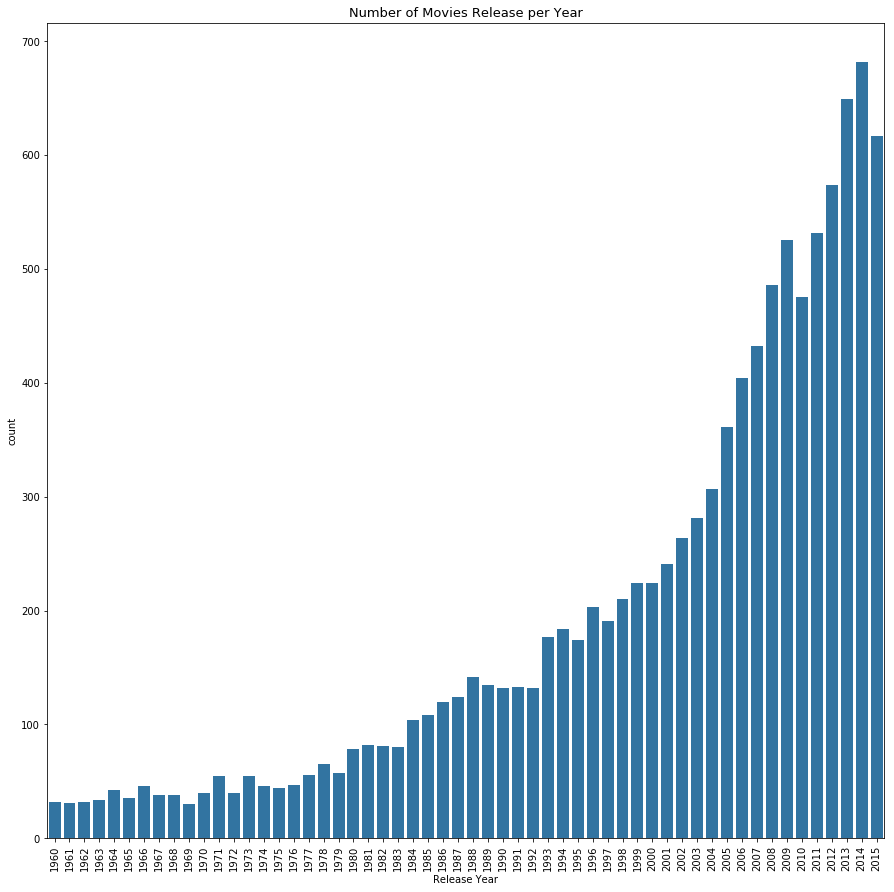

In [18]:
plt.figure(figsize=[15,15])
default_color = sb.color_palette()[0]
sb.countplot(data=df_tmdb_movies, x='release_year', color=default_color)
plt.title('Number of Movies Release per Year',fontsize = 13)
plt.xlabel('Release Year')
plt.xticks(rotation = 90);

> Year 2014 has the highest movies release

### 2. Genre with Highest Movies Release


In [19]:
df_tmdb_movies['genres']

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [20]:
# define a function that split the string genre and return count of the genre
def string_genre(xVar):
    #concat all the rows of the genres.
    plot_genre = df_tmdb_movies[xVar].str.cat(sep = '|')
    string_genre = pd.Series(plot_genre.split('|'))
    #concat each of the genre and return the value count.
    count_genre = string_genre.value_counts(ascending=False)
    return count_genre

In [21]:
all_genres=string_genre('genres')

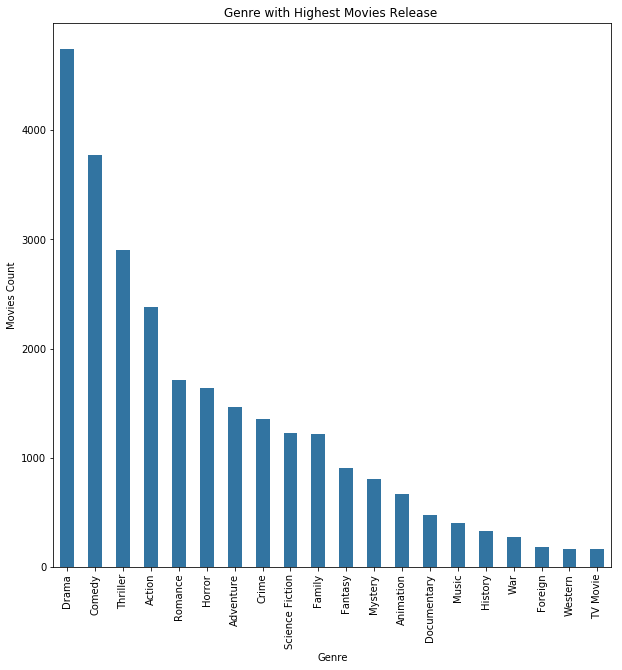

In [22]:
plt.figure(figsize=[10,10])

all_genres.plot(kind='bar',color=['#3274A1'])
plt.title('Genre with Highest Movies Release ');
plt.xlabel('Genre');
plt.ylabel('Movies Count');

> Drama genre is the Highest movie release

### 3. The most casted Actor in a movie

In [23]:
string_genre('cast')[:15]

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Julianne Moore        47
Alec Baldwin          47
Christopher Walken    46
Johnny Depp           46
dtype: int64

> Robert De Niro is the most casted Actor for 72 times

In [24]:
all_cast = string_genre('cast')[:15]

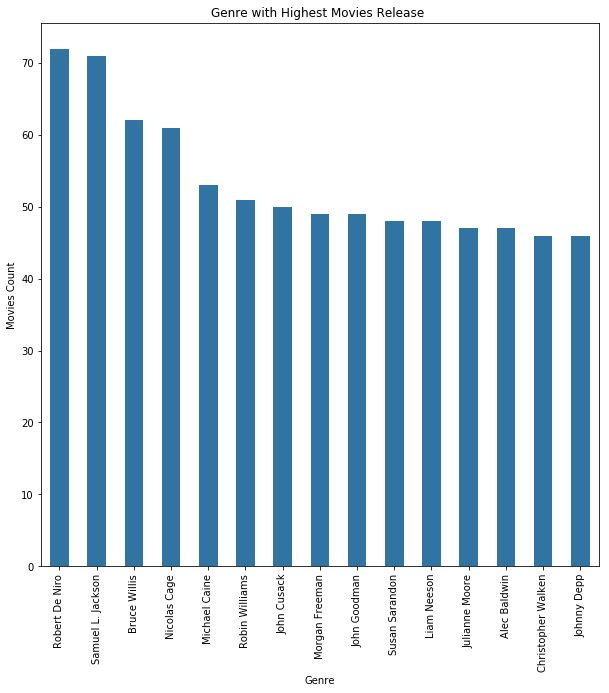

In [25]:
plt.figure(figsize=[10,10])

all_cast.plot(kind='bar',color=['#3274A1'])
plt.title('Genre with Highest Movies Release ');
plt.xlabel('Genre');
plt.ylabel('Movies Count');

> Robert De Niro is the most casted Actor

### 4. Director with highest number of Movies

In [26]:
string_genre('director')[:15]

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         30
Steven Spielberg        30
Steven Soderbergh       23
Ridley Scott            23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
David Cronenberg        19
John Carpenter          19
Francis Ford Coppola    19
Tim Burton              19
Barry Levinson          19
Robert Rodriguez        19
dtype: int64

>Woody Allen is the Director that dirct the highest number of movies; 46 times

In [27]:
all_dirc=string_genre('director')[:15]

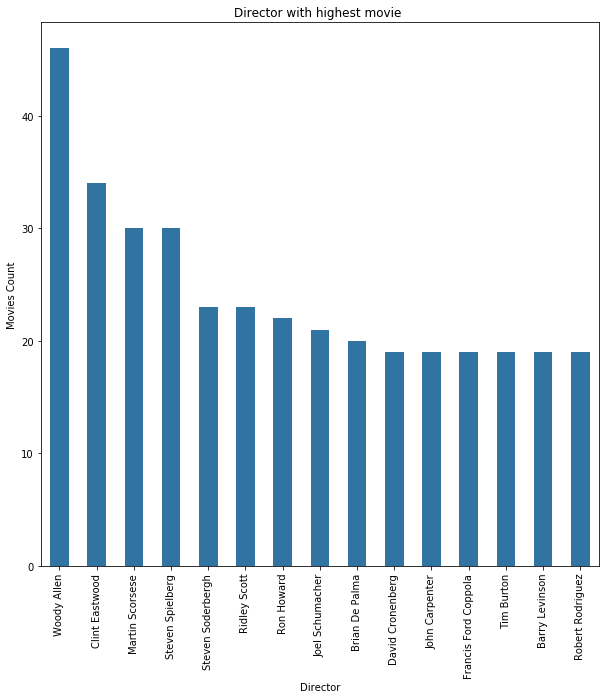

In [28]:
plt.figure(figsize=[10,10])

all_dirc.plot(kind='bar',color=['#3274A1'])
plt.title('Director with highest movie ');
plt.xlabel('Director');
plt.ylabel('Movies Count');

>> Woody Allen direct the highest number of Movies

### 5. The highest Production Company with a movie

In [29]:
string_genre('production_companies')[:15]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
dtype: int64

> Universal Pictures produce the most movies; 522 Movies

In [30]:
all_prod_comp = string_genre('production_companies')[:15]

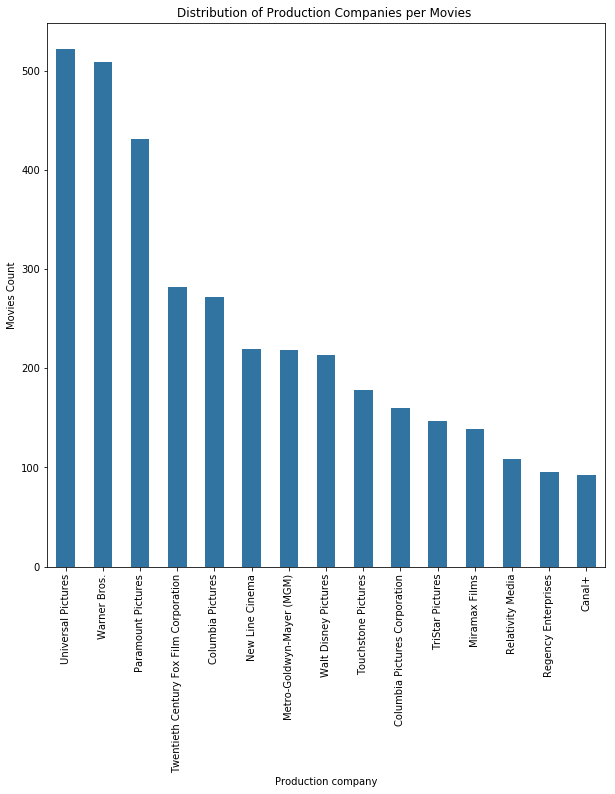

In [31]:
plt.figure(figsize=[10,10])

all_prod_comp.plot(kind='bar',color=['#3274A1'])
plt.title('Distribution of Production Companies per Movies ');
plt.xlabel('Production company');
plt.ylabel('Movies Count');

> > Universal Pictures produce the highest movies

In [32]:
#insert function with three parameters(index of the column in the dmdb movies dataset, 
#name of the column, value to be inserted)
df_tmdb_movies.insert(4,'profit_earned',df_tmdb_movies['revenue'] - df_tmdb_movies['budget'])

#showing the changes in the dataset
df_tmdb_movies.head()

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015


In [33]:
df_tmdb_movies.describe()

,id,popularity,budget,revenue,profit_earned,runtime,vote_count,release_year
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,3.849000e+03,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,7.056595e+07,102.468829,219.812972,2001.259622
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,1.506990e+08,30.493873,578.815324,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,-4.139124e+08,0.000000,10.000000,1960.000000
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,-1.312284e+06,90.000000,17.000000,1995.000000
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,2.014450e+07,99.000000,39.000000,2006.000000
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,8.198066e+07,112.000000,148.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,9767.000000,2015.000000


### 6.  Movies with highest and least Profit Earned 


In [34]:
#defining the function
def calculate(column):
    #for highest earned profit
    highest= df_tmdb_movies[column].idxmax()
    highest_details=pd.DataFrame(df_tmdb_movies.loc[highest])
    
    #for lowest earned profit
    lowest= df_tmdb_movies[column].idxmin()
    lowest_details=pd.DataFrame(df_tmdb_movies.loc[lowest])
    
    #collectin data in one place
    info=pd.concat([highest_details, lowest_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit_earned,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


1. The movie **Avatar** has the highest profit earned of 2.5 billion dollars, directed by James Cameron and release in year 2009

2.  Whereas the movie is **The Warrior's way** has lowest profit earned of -4.13e8 dollars, directed by Sngmoo lee and released in by 2010

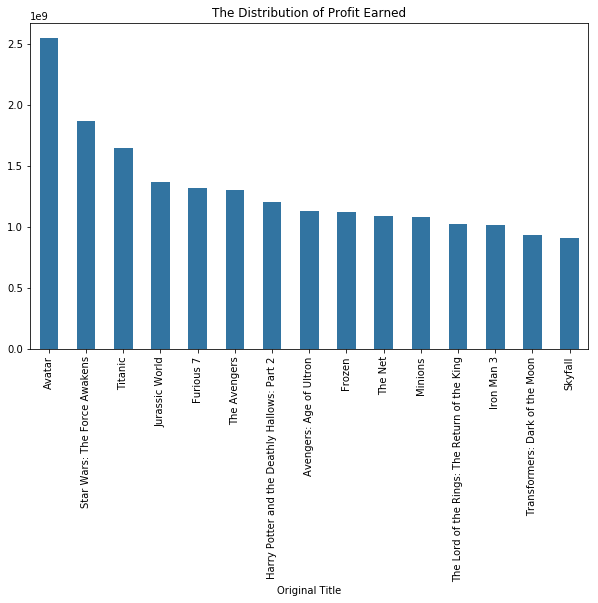

In [35]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="profit_earned",ascending=False).set_index("original_title")["profit_earned"][:15].plot(kind='bar'
                                                                                                                      , color='#3274A1')
plt.xlabel("Original Title")
plt.title("The Distribution of Profit Earned");


>> Avatar has the Higest Profit Earned

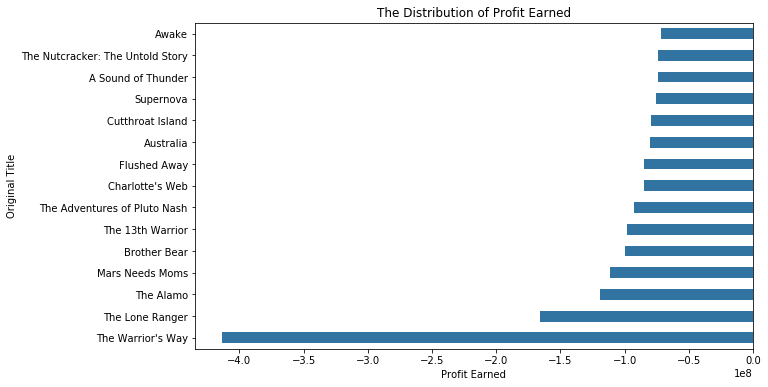

In [36]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="profit_earned",ascending=True).set_index("original_title")["profit_earned"][:15].plot(kind='barh'
                                                                                                                      , color='#3274A1')
plt.xlabel("Profit Earned")
plt.ylabel( "Original Title")
plt.title("The Distribution of Profit Earned");

>> The Warrior's way has the least Profit Earned

### 7. Movies with highest and least revenue

In [37]:
# we will call the same function calculate
calculate('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
profit_earned,2.54451e+09,-6e+06
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


>1. **Avatar Movie** the highest revenue  of   **2.78 billion dollar**
>2. **Shattered Glass** shows the least revenue  of **2 dollar**

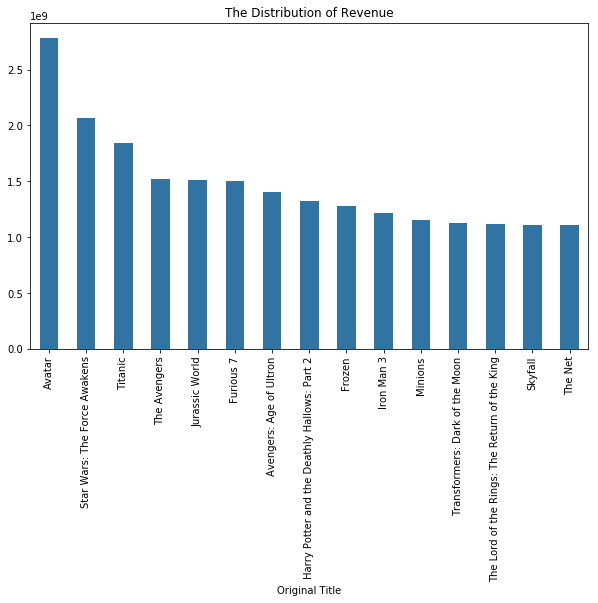

In [38]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="revenue",ascending=False).set_index("original_title")["revenue"][:15].plot(kind='bar'
                                                                                                          , color='#3274A1')
plt.xlabel("Original Title")
plt.title("The Distribution of Revenue");

>> Avatar has the Highest Revenue 

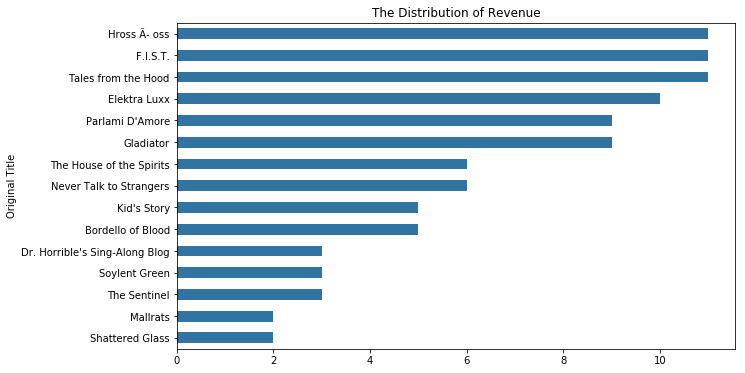

In [39]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="revenue",ascending=True).set_index("original_title")["revenue"][:15].plot(kind='barh'
                                                                                                          , color='#3274A1')
plt.ylabel("Original Title")
plt.title("The Distribution of Revenue");

> Shattered Glass has the least Revenue

### 8. Movies with largest and lowest budgets

In [40]:
# calling the function calculate
calculate('budget')

,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,1.10876e+07,NaN
profit_earned,-4.13912e+08,NaN
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


>1. Warrior's Way has the largest budget of 4.2 million dollars.
>2. Fear Clinic the lowest budget of 1 dollar

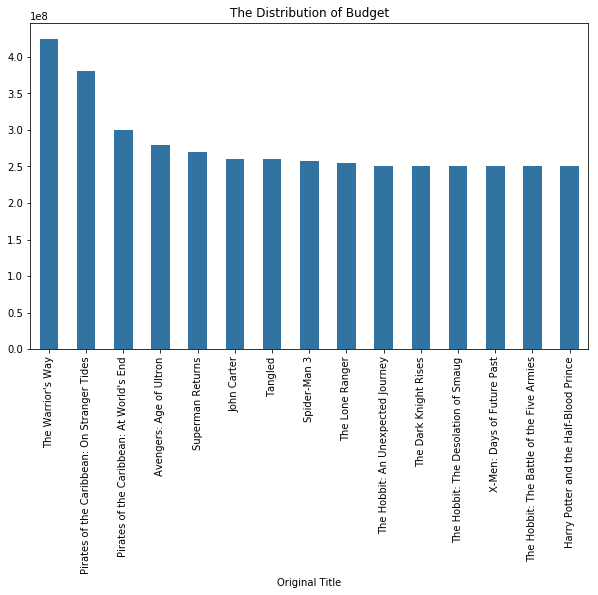

In [41]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="budget",ascending=False).set_index("original_title")["budget"][:15].plot(kind='bar'
                                                                                                        , color='#3274A1')
plt.xlabel("Original Title")
plt.title("The Distribution of Budget");


>> The Warrior's Way has the largest Budget

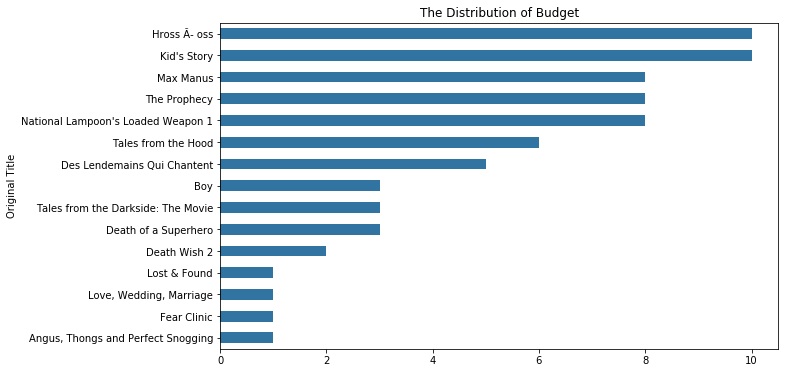

In [42]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="budget",ascending=True).set_index("original_title")["budget"][:15].plot(kind='barh'
                                                                                                        , color='#3274A1')
plt.ylabel("Original Title")
plt.title("The Distribution of Budget");


> Fear Clinic has the lowest budget

### 9. Movies with longest and shortest runtime

In [43]:
calculate('runtime')

,3894,92
id,125336,370687
popularity,0.006925,1.87604
budget,NaN,NaN
revenue,NaN,NaN
profit_earned,NaN,NaN
original_title,The Story of Film: An Odyssey,Mythica: The Necromancer
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...
director,Mark Cousins,A. Todd Smith
runtime,900,0
genres,Documentary,Fantasy|Action|Adventure


> 1. The Story of Film: An Odyssey has the longest runtime of 900 minutes.
> 2. Mythica: The Necromancer the shortest runtime of 0 minutes

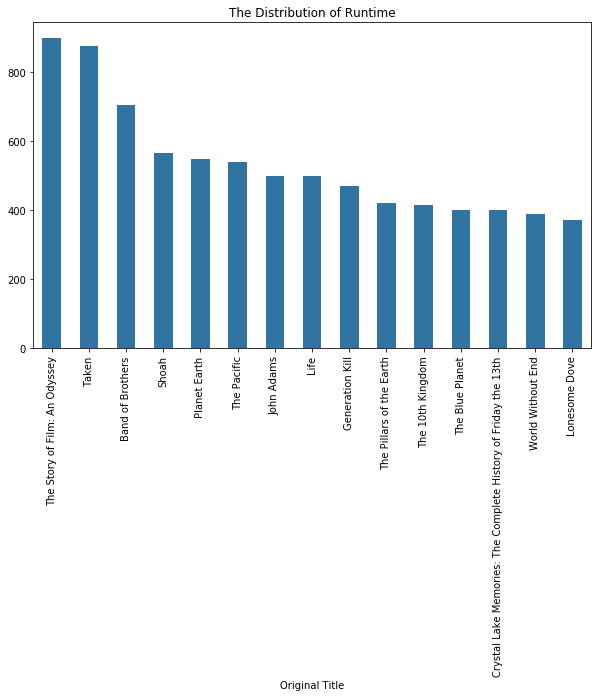

In [44]:
plt.figure(figsize=[10,6])
df_tmdb_movies.sort_values(by="runtime",ascending=False).set_index("original_title")["runtime"][:15].plot(kind='bar'
                                                                                                        , color='#3274A1')
plt.xlabel("Original Title")
plt.title("The Distribution of Runtime");

> The Story of Film: An Odyssey has the longest runtime 

### 10. Average runtime, budget and revenue of all movies

In [45]:
def average(column):
    return df_tmdb_movies[column].mean()


In [46]:
#Average Budget per movie
average('budget')

30828241.17446148

>> The Average Budget for the Movies Produce is 30 Million dollars

In [47]:
#Average Revenue per Movie
average('revenue')

89339812.865372702

>> The Average Revenue for the movies produce is 89 Millions Dollars

In [48]:
average('runtime')

102.46882862734135

>> The average runtime for movie is 102 minutes

### 11. Profit Earned over the years

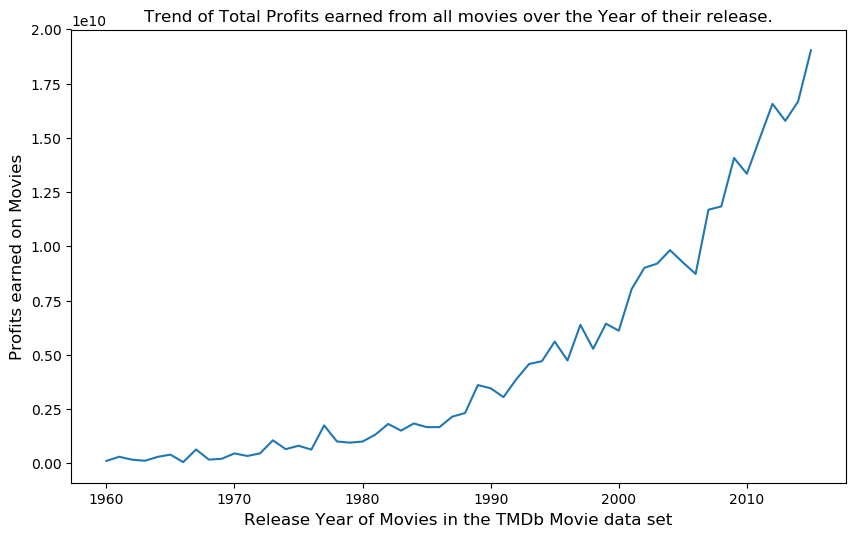

In [49]:
profits_year = df_tmdb_movies.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(10,6), dpi = 100)

#on x-axis
plt.xlabel('Release Year of Movies in the TMDb Movie data set', fontsize = 12)

plt.ylabel('Profits earned on Movies', fontsize = 12)

plt.title('Trend of Total Profits earned from all movies over the Year of their release.')

plt.plot(profits_year)

plt.show()

>> There is an increase in profit earned over the year

In [50]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

In [51]:
# To find the year with least profit
profits_year.idxmin()

1966

### 12. The budget and revenue over the year

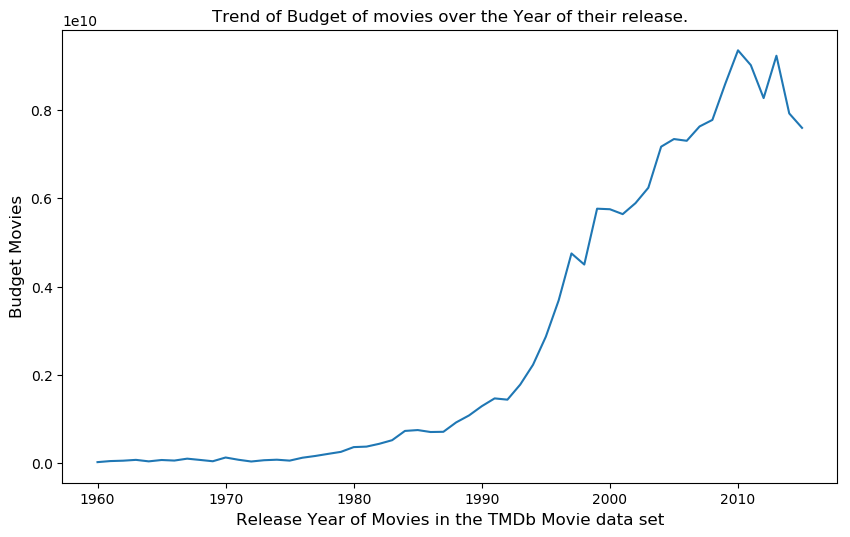

In [52]:
total_budget = df_tmdb_movies.groupby('release_year')['budget'].sum()

#figure size(width, height)
plt.figure(figsize=(10,6), dpi = 100)

#on x-axis
plt.xlabel('Release Year of Movies in the TMDb Movie data set', fontsize = 12)

plt.ylabel('Budget Movies', fontsize = 12)

plt.title('Trend of Budget of movies over the Year of their release.')

plt.plot(total_budget)
plt.show()


>> There is an increase in budget over the year which drop in 2009

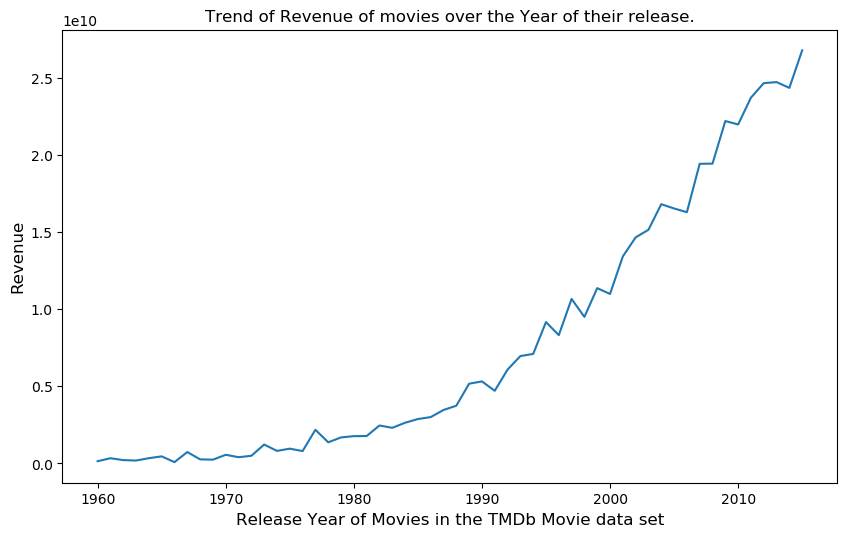

In [53]:
total_revenue = df_tmdb_movies.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(10,6), dpi = 100)


plt.xlabel('Release Year of Movies in the TMDb Movie data set', fontsize = 12)

plt.ylabel('Revenue', fontsize = 12)

plt.title('Trend of Revenue of movies over the Year of their release.')

plt.plot(total_revenue)
plt.show()

>> There is an increase in revenue over the year with continue to grow

<a id='conclusions'></a>
## Conclusions 

> The highest movies was produce in 2014

> The highest movies genre produce is Drama

> The most casted 3 actors in movies are:
>>1. Robert De Niro 72 times
>>2. Samuel L. Jackson  71 times
>>3. Bruce Willis 62 times
 
> The 3 highest production company are:
>>1. Universal Pictures  produces 522 Movies
>>2. Warner Bros. produces 509 Movies
>>3. Paramount Pictures 431 Movies

> There is an increase in Profit Earned per movie produce over the years

> There is an increase in budget of movies over the years which dip in 2009 and surge in 2012 


<a id='Limitations'></a>
## Limitations

> Most values of budget, revenue and runtime are 0, I assumed its missing

> The units of budget, revenue is not defined, the country in which the movies are produce in have different currency